In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [45]:
df=pd.read_csv('titanic.csv')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [46]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [47]:
df.drop(['who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class
0           0       3    male  22.0      1      0   7.2500        S   Third
1           1       1  female  38.0      1      0  71.2833        C   First
2           1       3  female  26.0      0      0   7.9250        S   Third
3           1       1  female  35.0      1      0  53.1000        S   First
4           0       3    male  35.0      0      0   8.0500        S   Third
..        ...     ...     ...   ...    ...    ...      ...      ...     ...
886         0       2    male  27.0      0      0  13.0000        S  Second
887         1       1  female  19.0      0      0  30.0000        S   First
888         0       3  female   NaN      1      2  23.4500        S   Third
889         1       1    male  26.0      0      0  30.0000        C   First
890         0       3    male  32.0      0      0   7.7500        Q   Third

[891 rows x 9 columns]

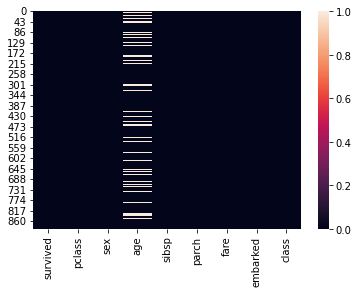

In [48]:
sns.heatmap(df.isnull())
plt.show()

In [49]:
# replace missing values with interpolated values 
df['age'] = df['age'].interpolate()

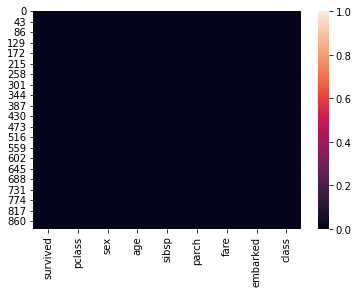

In [50]:
sns.heatmap(df.isnull())
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   class     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [52]:
# cols_to_drop = ['class']
# df = df.drop(cols_to_drop, axis=1)
df.drop(['class'],axis=1,inplace=True)
df


survived  pclass     sex   age  sibsp  parch     fare embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  22.5      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [53]:
# conver categorical columns to binary 
df['sex']=df['sex'].map({'male':1,'female':0})
df


survived  pclass  sex   age  sibsp  parch     fare embarked
0           0       3    1  22.0      1      0   7.2500        S
1           1       1    0  38.0      1      0  71.2833        C
2           1       3    0  26.0      0      0   7.9250        S
3           1       1    0  35.0      1      0  53.1000        S
4           0       3    1  35.0      0      0   8.0500        S
..        ...     ...  ...   ...    ...    ...      ...      ...
886         0       2    1  27.0      0      0  13.0000        S
887         1       1    0  19.0      0      0  30.0000        S
888         0       3    0  22.5      1      2  23.4500        S
889         1       1    1  26.0      0      0  30.0000        C
890         0       3    1  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [58]:
df.drop(['embarked'],axis=1,inplace=True)
df

survived  pclass  sex   age  sibsp  parch     fare
0           0       3    1  22.0      1      0   7.2500
1           1       1    0  38.0      1      0  71.2833
2           1       3    0  26.0      0      0   7.9250
3           1       1    0  35.0      1      0  53.1000
4           0       3    1  35.0      0      0   8.0500
..        ...     ...  ...   ...    ...    ...      ...
886         0       2    1  27.0      0      0  13.0000
887         1       1    0  19.0      0      0  30.0000
888         0       3    0  22.5      1      2  23.4500
889         1       1    1  26.0      0      0  30.0000
890         0       3    1  32.0      0      0   7.7500

[891 rows x 7 columns]

In [60]:
#seperate dataframe int x and y values 
x = df.values
y = df['survived'].values

In [62]:
# delete survived colums from x 
x= np.delete(x,0,axis=1)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [66]:
# Buid Decision tree classifier
from sklearn import tree 
df_clf =tree.DecisionTreeClassifier(max_depth=5) #build
df_clf.fit(x_train, y_train) #train



DecisionTreeClassifier(max_depth=5)

In [68]:
df_clf.score(x_test,y_test) # make prediction
y_pred = df_clf.predict(x_test)
df_clf.score(x_test,y_test)

0.7873134328358209

In [70]:
# build randomForest classifier
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test,y_test)

0.8432835820895522

In [72]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test,y_test)

0.7835820895522388

In [73]:
# naive bayes classifier 
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
nb_clf.score(x_test,y_test)

0.7835820895522388